In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset from the cvs file using pandas
data = pd.read_csv('creditcard.csv')

# explore the dataset
print(data.columns)

print(data.shape)

print(data.describe())

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

 

In [31]:
# Reduce the data (10%) to save resources
data = data.sample(frac = 0.1, random_state = 1)

print(data.shape)

(28481, 31)


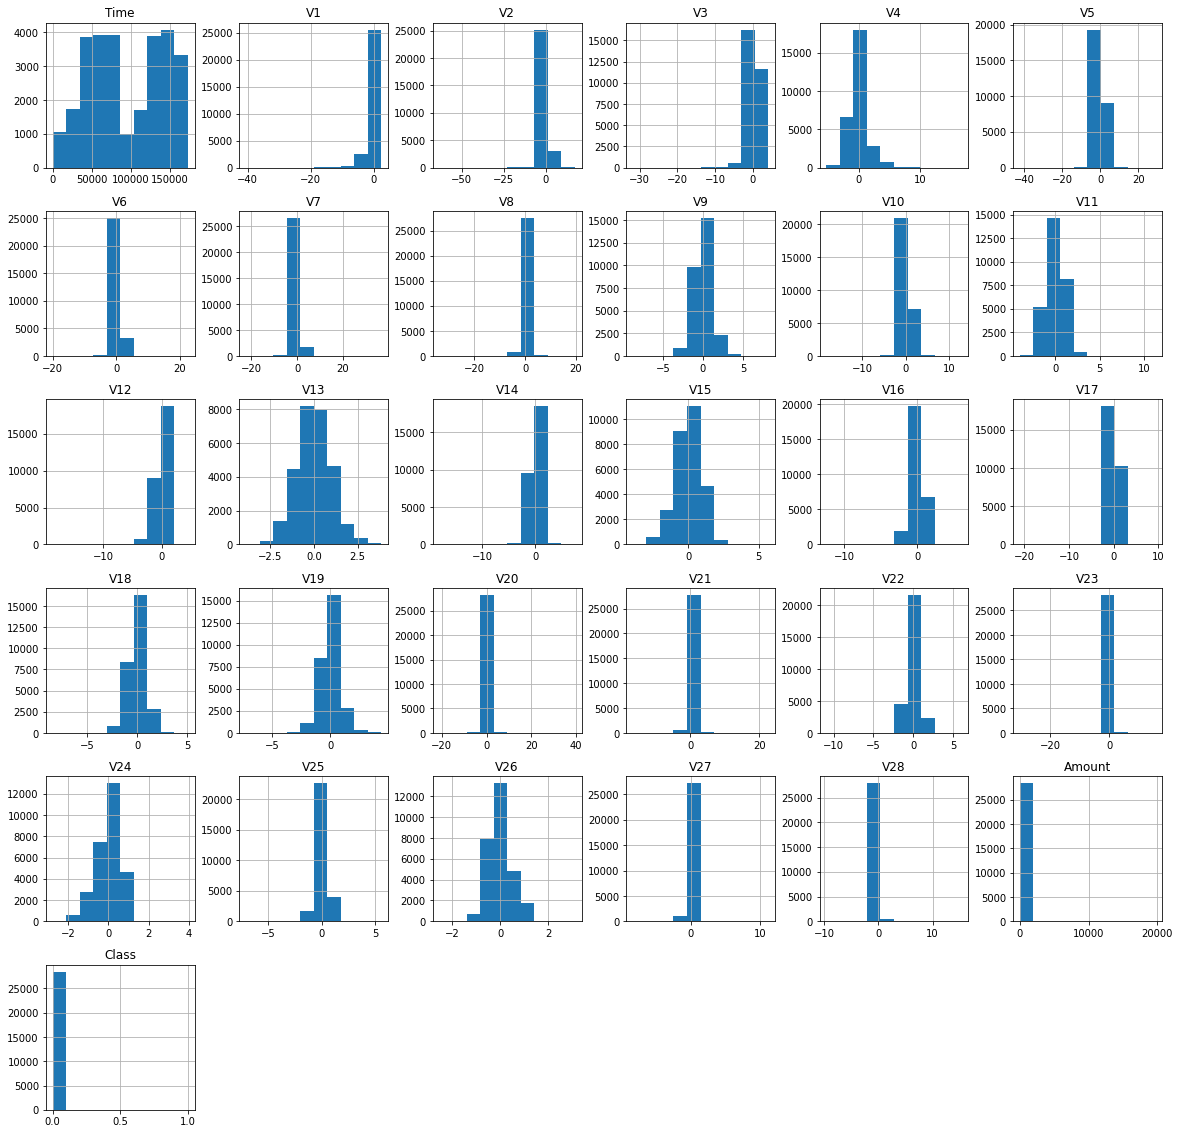

In [10]:
# Plot histogram of each parameter 

data.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases : {}'.format(len(Fraud)))
print('Valid Cases : {}'.format(len(Valid)))


0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


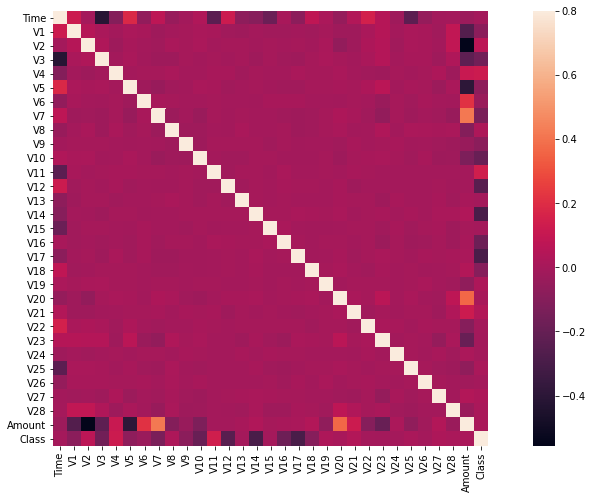

In [14]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (16,8))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [18]:
# Get all the columns from the dataframe
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ['Class']]

# Store the variable we'll be predicting on
target = 'Class'

X = data[columns]
y = data[target]

#Print the shapes of X and y
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


In [24]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define a random state 
state = 1

# define the outlier detection methods
classifiers = {
    'Isolation Forest': IsolationForest(max_samples = len(X), contamination = outlier_fraction, random_state = state),
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,
    contamination = outlier_fraction
    )
}

In [26]:
# Fit the model 
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
# Reshape the prediction values to 0 for valid, 1 for fraud
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != y).sum()

# Run classification metrics
print('{}: {}'.format(clf_name, n_errors))
print(accuracy_score(y,y_pred))
print(classification_report(y, y_pred))

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

